In [100]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "2b-data"

### NEHA NAIR - PES2UG22CS348
### NATASHA SANTOSH - PES2UG22CS342
### ADITYA GIRISH - PES2UG22CS034

 # Overfitting and Regularization

In the realm of predictive modeling, the pursuit of creating a model that perfectly fits the training data can inadvertently lead to a phenomenon known as overfitting. Overfitting occurs when a model becomes excessively complex, capturing not only the genuine patterns within the data but also the noise and random fluctuations present in the training set. 

The hyper-adaptation to the training data renders the model less capable of generalizing to new, unseen data, as it effectively memorizes the training examples rather than discerning meaningful relationships. As a result, an overfitted model may exhibit impressive performance on the training data but performs poorly when faced with real-world scenarios. The delicate balance between capturing essential patterns and avoiding the trap of overfitting underscores the importance of techniques like regularization, which aim to ensure model generalization by restraining excessive complexity.

There are three Regularization techniques we will be dealing with, all of which use the idea of penalizing terms to tackle overfitting.

But before we go any further, let's have a look at the data.

**Data Dictionary**

* Product_ID:- Unique identifier for each electronic device. <br>
* Product_Weight:- Weight of the device  <br>
* Energy_Efficiency:- Energy efficiency rating (e.g., "Energy Efficient", "Standard"). <br>
* Visibility_Index:- The % of the total display area of all products in a store allocated to the particular product <br>
* Product_Category:- Category of the electronic device (e.g., "Laptops", "Smartphones"). <br>
* Product_Price:- Price of the device in dollars<br>
* Store_ID:- Unique identifier for the store.<br>
* Store_Established_Year:- Number of years since the store was established.<br>
* Store_Size:- Size classification of the store (e.g., "Small", "Medium").<br>
* Location_Type:- The type of city in which the store is located<br>
* Store_Type:- Type of store (e.g., "Electronics Store Type1").<br>
* Sales_Performance:- Sales of the electronic device in the particular store. This is the outcome variable to be predicted.


## Visualizing the data

Let's visualize this all in the form of a Data Frame

In [101]:
data <- read.csv("/kaggle/input/2b-data/2b-data.csv")
head(data)


,Product_ID,Product_Weight,Energy_Efficiency,Visibility_Index,Product_Category,Product_Price,Store_ID,Store_Established_Year,Store_Size,Location_Type,Store_Type,Sales_Performance
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,FDA15,9.300,Energy Efficient,0.01604730,Laptops,249.8092,OUT049,14,Medium,Tier 1,Electronics Store Type1,3735.1380
2,DRC01,5.920,Standard,0.01927822,Smartphones,48.2692,OUT018,4,Medium,Tier 3,Electronics Store Type2,443.4228
3,FDN15,17.500,Energy Efficient,0.01676007,Tablets,141.6180,OUT049,14,Medium,Tier 1,Electronics Store Type1,2097.2700
4,FDX07,19.200,Standard,0.06613203,Monitors,182.0950,OUT010,15,Small,Tier 3,Retail Electronics Store,732.3800
5,NCD19,8.930,Energy Efficient,0.06613203,Refrigerators,53.8614,OUT013,26,High,Tier 3,Electronics Store Type1,994.7052
6,FDP36,10.395,Standard,0.06613203,Microwaves,51.4008,OUT018,4,Medium,Tier 3,Electronics Store Type2,556.6088


## Ridge Regression
Ridge regression is a linear regression technique that incorporates L2 regularization to address issues in predictive modeling (overfitting, multi-colinearity etc).
Linear regression, aims to minimize the sum of squared residuals whereas Ridge regression introduces a penalty term proportional to the square of the magnitude of the coefficients. This penalty, controlled by a hyperparameter (often denoted as lambda), discourages large coefficient values, effectively constraining the model’s complexity, enhancing its stability and generalization performance.


**1)** Perform Ridge Regression on the training data and compare the predictions with the test data to check for the fit of the model. (Hint: Use the glmnet library) (2 marks) <br>
You can split the dataset into 70% train and 30% test.  

Training MSE: 1942771 
Training R2: 0.3375533
Testing MSE: 1841856 
Testing R2: 0.3566446
Optimal Lambda:  3.511192

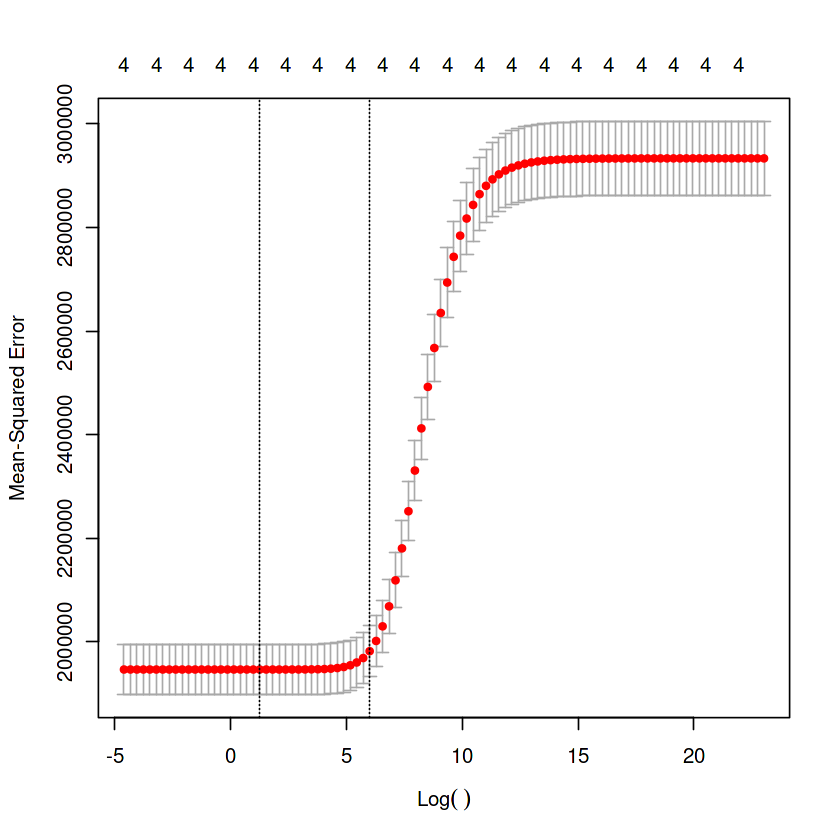

In [102]:
library(glmnet)
library(Matrix)
library(caret)
library(lattice)

target <- data$Sales_Performance  
features <- data[, -which(names(data) == 'Sales_Performance')]

numeric_cols <- sapply(features, is.numeric)  
X_numeric <- features[, numeric_cols]  

set.seed(42)
train_indices <- createDataPartition(target, p = 0.7, list = FALSE)
X_train <- X_numeric[train_indices, ]
X_test <- X_numeric[-train_indices, ]
y_train <- target[train_indices]
y_test <- target[-train_indices]

X_train_scaled <- scale(X_train)
X_test_scaled <- scale(X_test, center = attr(X_train_scaled, "scaled:center"), scale = attr(X_train_scaled, "scaled:scale"))

ridge_cv <- cv.glmnet(as.matrix(X_train_scaled), y_train, alpha = 0, lambda = 10^seq(10, -2, length = 100))
plot(ridge_cv)

optimal_lambda <- ridge_cv$lambda.min

ridge_fit <- glmnet(as.matrix(X_train_scaled), y_train, alpha = 0, lambda = optimal_lambda)

train_predictions <- predict(ridge_fit, s = optimal_lambda, newx = as.matrix(X_train_scaled))
test_predictions <- predict(ridge_fit, s = optimal_lambda, newx = as.matrix(X_test_scaled))

train_mse <- mean((y_train - train_predictions)^2)
test_mse <- mean((y_test - test_predictions)^2)
train_r2 <- 1 - sum((y_train - train_predictions)^2) / sum((y_train - mean(y_train))^2)
test_r2 <- 1 - sum((y_test - test_predictions)^2) / sum((y_test - mean(y_test))^2)

cat("Training MSE:", train_mse,"\nTraining R2:", train_r2)
cat("\nTesting MSE:", test_mse,"\nTesting R2:", test_r2)
cat("\nOptimal Lambda: ", optimal_lambda)


**2)** Is it possible for you to somehow conduct hyperparameter tuning and find the best lambda value for the Ridge Regression model? (Hint: use the cv.glmnet function)   (1 mark)

In [103]:
set.seed(42)
ridge_cv <- cv.glmnet(as.matrix(X_train_scaled), y_train, alpha = 0, lambda = 10^seq(10, -2, length = 100), nfolds = 10)
best_lambda <- ridge_cv$lambda.min

cat("Best Lambda:\n", best_lambda)


Best Lambda:
 2.656088

**Yes it is possible for to conduct hyperparameter tuning and find the best lambda value for the ridge regression model**

**3)** With the optimal lambda, build the model again and print the coefficients of the various dependent variables. What can you comment about the relationship between lambda and the strength of regularization?        (2 marks)


In [104]:
ridge_model <- glmnet(as.matrix(X_train_scaled), y_train, alpha = 0, lambda = best_lambda)
coefficients <- coef(ridge_model, s = best_lambda)
print(coefficients)
cat("Coefficients of the Ridge Regression model with optimal lambda:\n")
print(as.matrix(coefficients))

5 x 1 sparse Matrix of class "dgCMatrix"
                                 s1
(Intercept)            2184.2507949
Product_Weight            0.1127951
Visibility_Index       -225.3823918
Product_Price           962.8110406
Store_Established_Year   97.1263295
Coefficients of the Ridge Regression model with optimal lambda:
                                 s1
(Intercept)            2184.2507949
Product_Weight            0.1127951
Visibility_Index       -225.3823918
Product_Price           962.8110406
Store_Established_Year   97.1263295


As the lambda value increases the strength of regularization increases. If the lambda value decreases the strength of regularization also decreases.

## Lasso Regression

Lasso regression is similar to Ridge Regression except that instead of L2 regularization, it employs L1 regularization to address the very same issues that Ridge Regression addresses. 

There are however, a couple of differences between the two. The first and most obvious being that since Lasso Regression implements L1 regularization, the penalty term in this case is proportional to the absolute value of the coefficient. 

Another point to note is that unlike its Ridge counterpart, Lasso Regression can push some coefficients to exactly 0. This effectively drops the feature from the predictive model (Similar to how we drop values through visual analysis). Lasso Regression can thus be used effectively for Feature Selection as well.

**1)** Write code to build a Lasso Regression model similar to how you built the Ridge Regression model. This time incorporate hyperparameter tuning right away. So first print the optimal lambda value.                  (2 marks)

Optimal Lambda: 3.32244 
5 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)              156.743275
Product_Weight            -1.348342
Visibility_Index       -4692.227639
Product_Price             15.490951
Store_Established_Year    12.343449
R-squared: 0.3432551 


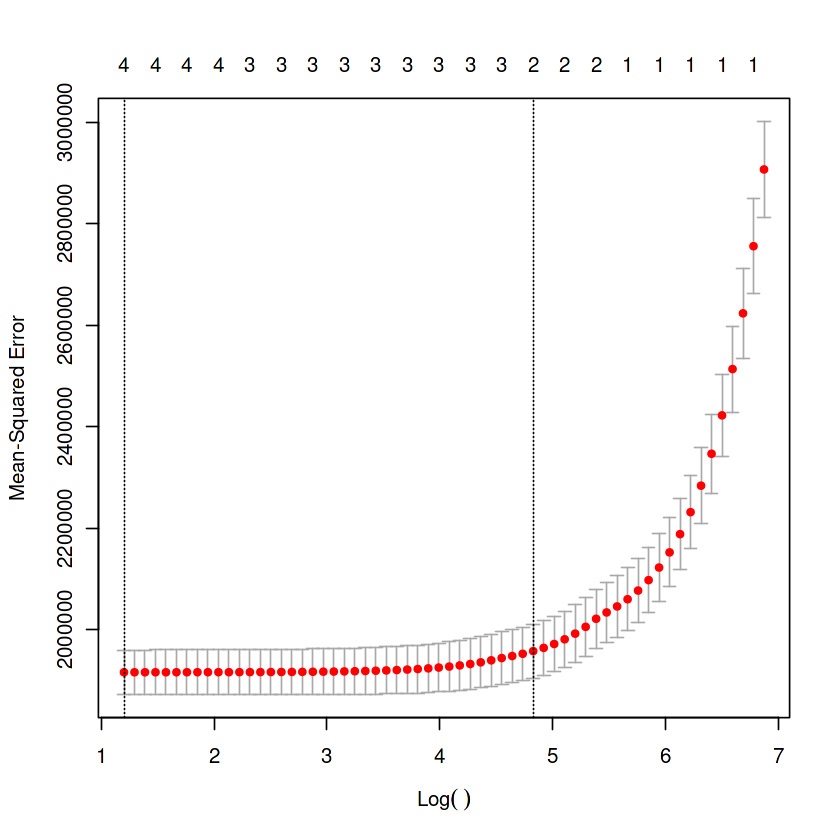

In [105]:
y <- data$Sales_Performance
x <- data[, -which(names(data) == 'Sales_Performance')]

numeric_columns <- sapply(x, is.numeric)
x_numeric <- as.matrix(x[, numeric_columns])

for (i in seq_len(ncol(x_numeric))) {
  x_numeric[is.na(x_numeric[, i]), i] <- mean(x_numeric[, i], na.rm = TRUE)
}

lasso_cv <- cv.glmnet(x_numeric, y, alpha = 1)

optimal_lambda <- lasso_cv$lambda.min
cat("Optimal Lambda:", optimal_lambda, "\n")

plot(lasso_cv)

lasso_model <- glmnet(x_numeric, y, alpha = 1, lambda = optimal_lambda)

print(coef(lasso_model))

y_predicted <- predict(lasso_model, s = optimal_lambda, newx = x_numeric)
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)
rsq <- 1 - (sse / sst)
cat("R-squared:", rsq, "\n")


**2)** Display the coefficients of all the variables. Do you notice some variables being dropped out? Which ones are they?   (1 mark)

In [106]:
coefficients <- coef(lasso_model, s = optimal_lambda)
df <- as.data.frame(as.matrix(coefficients))
print(df)

dropped <- rownames(df)[df$s1 == 0]
cat("Dropped variables:\n")
print(dropped)


                                 s1
(Intercept)              156.743275
Product_Weight            -1.348342
Visibility_Index       -4692.227639
Product_Price             15.490951
Store_Established_Year    12.343449
Dropped variables:
character(0)


**Dropped variables are the features that Lasso has removed because their coefficients were reduced to zero during the regularization process.**

## Elastic Net Regression

Elastic Net regression, an advanced form of linear regression, combines the benefits of L1 (Lasso) and L2 (Ridge) regularization methods. By integrating both penalty terms, Elastic Net overcomes the limitations of each, offering resilience against multicollinearity, aiding feature selection, and preventing overfitting. 

This approach makes Elastic Net a very versatile approach for achieving accurate and efficient models by finding a middle ground between dropping parameters and retaining important predictors. 

**1)** Build your Elastic Net Regression model incorporating all the steps we previously followed for ridge and lasso regression. (Play around with the alpha value and find out how it affects the model)            (2 marks)


+ Fold1.Rep1: alpha=0.99173, lambda=0.079147 
- Fold1.Rep1: alpha=0.99173, lambda=0.079147 
+ Fold1.Rep1: alpha=0.19749, lambda=0.004934 
- Fold1.Rep1: alpha=0.19749, lambda=0.004934 
+ Fold1.Rep1: alpha=0.82618, lambda=0.542598 
- Fold1.Rep1: alpha=0.82618, lambda=0.542598 
+ Fold1.Rep1: alpha=0.96938, lambda=0.014000 
- Fold1.Rep1: alpha=0.96938, lambda=0.014000 
+ Fold1.Rep1: alpha=0.02477, lambda=0.002469 
- Fold1.Rep1: alpha=0.02477, lambda=0.002469 
+ Fold1.Rep1: alpha=0.06624, lambda=0.003358 
- Fold1.Rep1: alpha=0.06624, lambda=0.003358 
+ Fold1.Rep1: alpha=0.93337, lambda=2.873420 
- Fold1.Rep1: alpha=0.93337, lambda=2.873420 
+ Fold1.Rep1: alpha=0.59375, lambda=6.337946 
- Fold1.Rep1: alpha=0.59375, lambda=6.337946 
+ Fold1.Rep1: alpha=0.99040, lambda=4.538926 
- Fold1.Rep1: alpha=0.99040, lambda=4.538926 
+ Fold1.Rep1: alpha=0.44664, lambda=0.031973 
- Fold1.Rep1: alpha=0.44664, lambda=0.031973 
+ Fold1.Rep1: alpha=0.93413, lambda=0.010749 
- Fold1.Rep1: alpha=0.93413, lambd

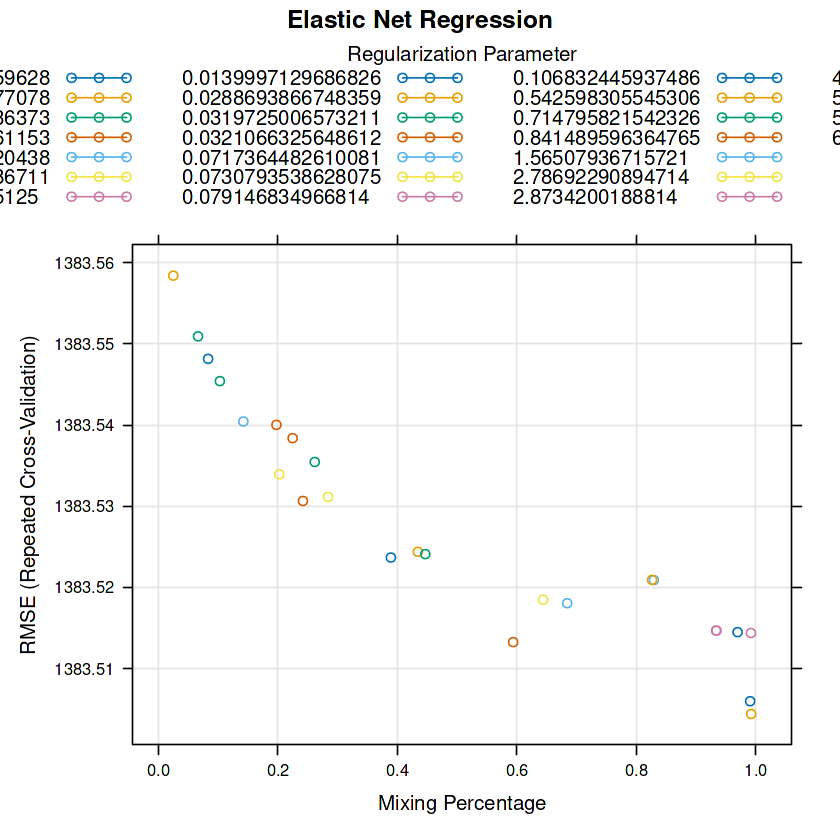

In [107]:
## Write your code here
library(glmnet)
y <- data$Sales_Performance
x <- data[, -which(names(data) == 'Sales_Performance')]
x_numeric <- x[, numeric_columns]
data_prepared <- data.frame(x_numeric, Sales_Performance = y)
train_control <- trainControl(method = "repeatedcv", number =3, repeats =5, search = "random", verboseIter = TRUE)
elastic_net_model <- train(Sales_Performance ~ ., data = data_prepared, method = "glmnet", preProcess = c("center", "scale"), tuneLength = 25, trControl = train_control)
predicted_values <- predict(elastic_net_model, newdata = data_prepared)
r_squared <- cor(data_prepared$Sales_Performance, predicted_values)^2
plot(elastic_net_model, main = "Elastic Net Regression")

Identify and list the variables that have been dropped in the Elastic Net model. How does this compare to the variables dropped in the Lasso model? <br>
What does that tell you about the number of hyperparameters in Elastic Net Regression compared to the other two models?

Lasso tends to drop more variables because it relies fully on L1 regularization.
Elastic Net drops fewer variables, L2 regularization keeps some of them with small non-zero coefficients.

Lasso has one hyperparameter: lambda - strength of L1 regularization.

Ridge also has one hyperparameter: lambda - strength of L2 regularization.

Elastic Net has two hyperparameters: lambda and alpha. When alpha = 1, it behaves like Lasso; when alpha = 0, it behaves like Ridge. This gives Elastic Net more flexibility to balance feature selection and shrinkage, allowing it to handle correlated variables better